In [1]:
import pandas as pd
from scripts import tt_impact as tt
from scripts import kb
import numpy as np
import warnings
warnings.filterwarnings("ignore")
#kb_ = kb.get_kb_completeness()
#kb__ = kb.get_kb_impact_completeness()
tt.training_testing_completeness()
tt.evaluate_techniques()

abalone: 0.0
abalone: 0.016401359827050013
abalone: 0.020422010092055
abalone: 0.01762226017746928
abalone: 0.017255246415361487
abalone: 0.021969704878384174
abalone: 0.023439864184305506
abalone: 0.016400188606333143
abalone: 0.0
abalone: 0.00847624170140997
abalone: 0.008125914092840462
abalone: 0.009606080949011919
abalone: 0.009748182596554574
abalone: 0.019470079531092505
abalone: 0.014448693032438141
abalone: 0.008317397435709284
abalone: 0.0
abalone: 0.02393154604113961
abalone: 0.029800725626896722
abalone: 0.03052816695440601
abalone: 0.030548090781864573
abalone: 0.018369046468920205
abalone: 0.027972229435223532
abalone: 0.024360836125411796
abalone: 0.0
abalone: 0.010335502433902766
abalone: 0.008758334508662063
abalone: 0.01522081564933652
abalone: 0.015624952488042243
abalone: 0.022696212482902087
abalone: 0.023263076982283463
abalone: 0.012892641643835953
abalone: 0.0
abalone: 0.004552578376931626
abalone: 0.008660370747601091
abalone: 0.007484627640905049
abalone: 0.00

In [2]:
import matplotlib.pyplot as plt

def bar_plot(title, labels, training_means):

    x = np.arange(len(labels))  # the label locations
    width = 0.5  # the width of the bars

    fig, ax = plt.subplots(figsize=(8, 6))
    bar = ax.bar(x, training_means, width, label='Testing')
    y_pos = range(len(labels))
    plt.xticks(y_pos, labels, rotation=90)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('RMSE')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    for rect in bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.3f}', ha='center', va='bottom')

    fig.tight_layout()
    #plt.savefig(your_path + title + "-all.pdf", bbox_inches='tight')
    #plt.ylim(0,55)
    #plt.savefig(your_path + title + "-ylim.pdf", bbox_inches='tight')

    plt.show()

In [3]:
data = pd.read_csv("../results/prediction_completeness.csv")
data


,dataset,model,technique,rmse
0,abalone,DecisionTree,impute_standard,0.000000
1,abalone,DecisionTree,impute_mode,0.016401
2,abalone,DecisionTree,impute_random,0.020422
3,abalone,DecisionTree,impute_knn,0.017622
4,abalone,DecisionTree,impute_mice,0.017255
...,...,...,...,...
667,visualizing_soil,SVC,impute_knn,0.211017
668,visualizing_soil,SVC,impute_mice,0.210539
669,visualizing_soil,SVC,impute_logistic_regression,0.113679
670,visualizing_soil,SVC,impute_random_forest,0.407784


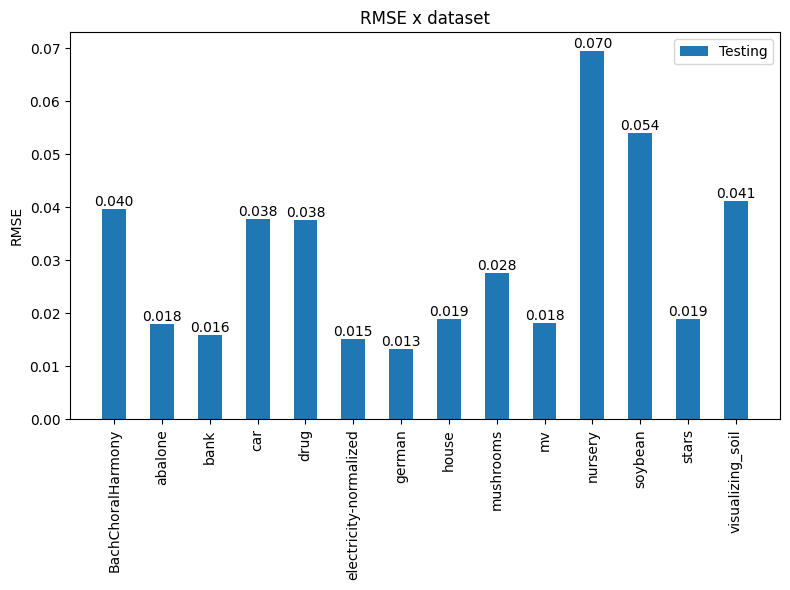

In [4]:
### performance per dataset
df = data[['dataset','rmse']].groupby(['dataset']).mean().reset_index().copy()
bar_plot("RMSE x dataset",df.dataset.unique(),df.rmse)

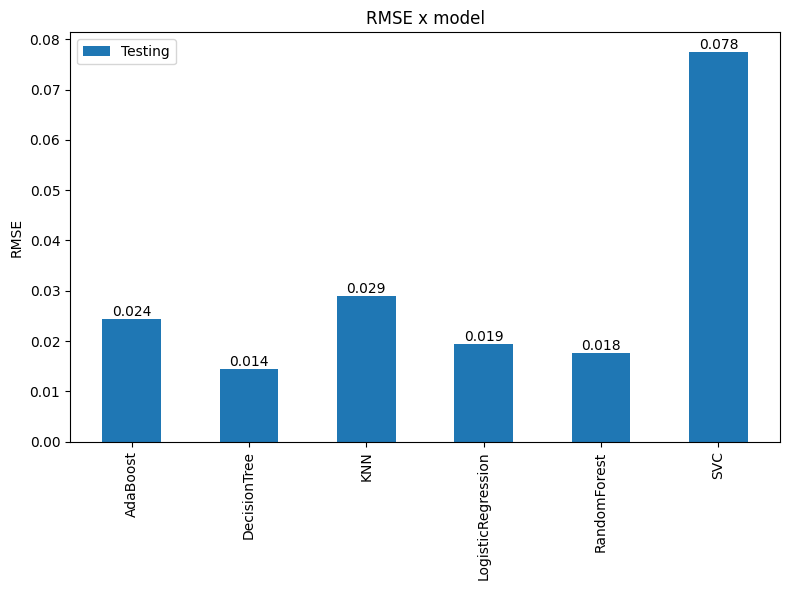

In [5]:
### performance per modello
df = data[['model','rmse']].groupby(['model']).mean().reset_index().copy()
bar_plot("RMSE x model",df.model.unique(),df.rmse)


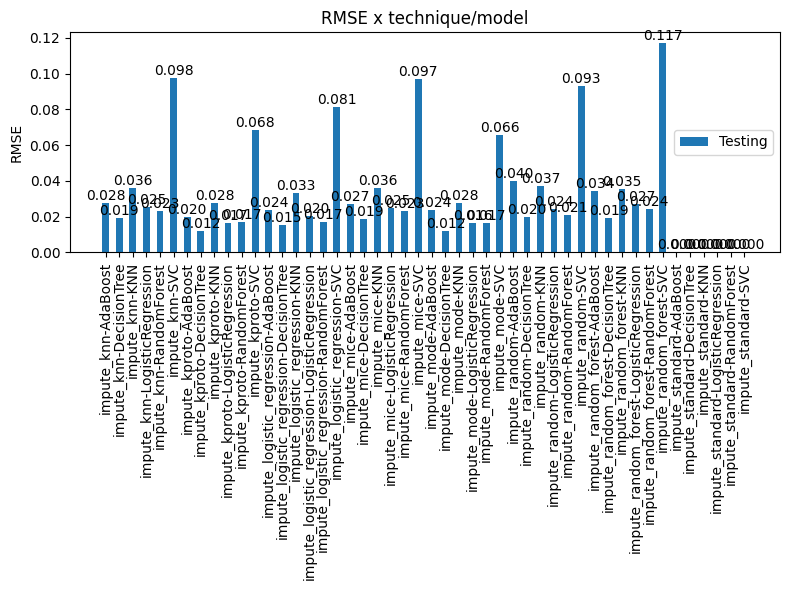

In [6]:
### performance per technique e modello
labels = []
for technique in np.sort(data.technique.unique()):
    for model in np.sort(data.model.unique()):
        labels.append(technique+"-"+model)

df = data[['technique','model','rmse']].groupby(['technique','model']).mean().reset_index().copy()
bar_plot("RMSE x technique/model",labels,df.rmse)

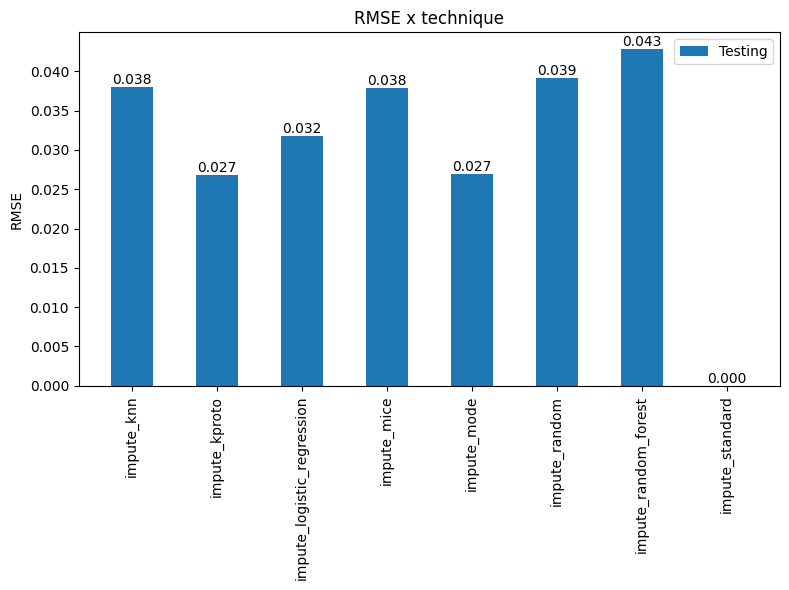

In [7]:
### performance per tecnica
df = data[['technique','rmse']].groupby(['technique']).mean().reset_index().copy()
bar_plot("RMSE x technique",df.technique.unique(),df.rmse)

In [8]:
len(data[data.rmse < 0.10])/len(data)

0.9479166666666666

In [9]:
len(data[data.rmse < 0.15])/len(data)

0.9747023809523809

In [10]:
len(data[data.rmse < 0.20])/len(data)

0.9880952380952381

In [11]:
len(data[data.rmse < 0.30])/len(data)

0.9925595238095238

In [12]:
data.rmse.mean()

np.float64(0.03040744150568995)

In [13]:
data.rmse.median()

np.float64(0.01755958620643355)